# PCA and SVD


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

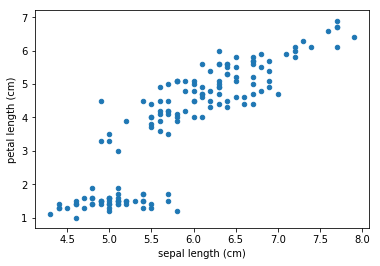

In [27]:
from sklearn import datasets
iris = datasets.load_iris()

X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target

X.plot(0,2,kind='scatter');

In [3]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**The goal** : 

To determine the best line where variation is maximal.   
This will be our principal axis.  

**Here are the steps: **

1)
Let data matrix X be of n x p size, where n is the number of samples
and p is the number of variables.  Let us assume that it is centered,
i.e. **column means have been substracted.** 

In [28]:
# for now lets just keep two dimensions: 
X=X.iloc[:,[0,2]]

In [29]:
#1)  Center the Data
mu=X.mean(axis=0)

X_centered=X-mu  

2) Then the **pxp covariance matrix C** is given by:
**$C=X^tX$  **    


In [30]:
#2) Create the covariance Matrix:

C=np.dot(X_centered.T,X_centered)
C


array([[ 102.16833333,  189.77866667],
       [ 189.77866667,  463.86373333]])

**Features of the covariance matrix: **   
a) The diagonal terms provide us with variance measurements of the matrix        
b) The off-diagonal terms provide covariance measurements    

Covariance matrix C is a symmetric matrix and it can be **diagonalized** by:  **$C=VLV^t$ **  (Eqn 1) 

Where **V**:  is a matrix of eigenvectors    
and **L**: is a diagonal matrix with eigenvalues $\lambda_i$

The eigenvectors are called **principal axes** of the data

CV=LV   
(where $L = \lambda*I) $

The idea is : [matrix diagonalization](http://mathworld.wolfram.com/MatrixDiagonalization.html)

*Note 1*: An optimal covariance matrix is one where all off-diagonal terms are zero.

*Note 2*: Diagonization provides us with a **change of basis!**

 

3) **Calculate Eigenvalues: **

$det(C-\lambda*I)=0  $ 
  

$(102.16-\lambda)(463.86-\lambda)-(189.78)^2 =0$


[determinants can be used to solve sys. of equations](https://en.wikipedia.org/wiki/Determinant)

In [7]:
# calculate eigenvalues, use quadratic formula! 
print(283+np.sqrt(68178))
print(283-np.sqrt(68178))

print('\n')
print('Total variance')
print(544.10 + 21.89)

544.10917257
21.8908274304


Total variance
565.99


In [8]:
# sanity check: adding up variance from X1, X2
102.16833333+463.86373333

# Wow! 
# The sum of the squares of the singular values should be equal to the 
# total variance in X

566.03206666

In [ ]:
#4 ) Calculate Eigenvectors: 

Solve: CV=LV 













<img src="img_data/IMG_1445.JPG", width=800, style="transform: rotate(90deg)">

In [9]:
# Lets do the same thing with numpy: 

eig_vals, V = np.linalg.eig(C)
eig_vals
# Pretty close! 

array([  20.86753931,  545.16452735])

In [10]:
# A look at our Eigenvectors
V

array([[-0.91920275, -0.39378459],
       [ 0.39378459, -0.91920275]])

In [11]:
ordered = sorted(zip(eig_vals, V.T), reverse=True)
eig_vals = np.array([_[0] for _ in ordered])
V = np.column_stack((_[1] for _ in ordered))
V

array([[-0.39378459, -0.91920275],
       [-0.91920275,  0.39378459]])

In [12]:
V[:, 0].reshape(2, 1).T

array([[-0.39378459, -0.91920275]])

In [13]:
X_centered.shape

(150, 2)

In [25]:
X_transformed = np.dot(V[:, 0], X_centered.T)
#X_transformed.shape

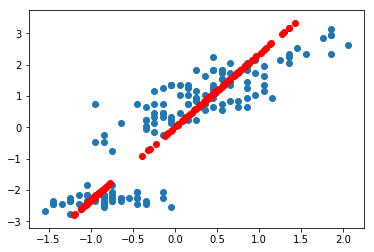

In [23]:
X_reconstituted = np.dot(X_transformed.reshape(150, 1),
                         V[:, 0].reshape(1, 2))

plt.scatter(X_centered['sepal length (cm)'],X_centered['petal length (cm)']);
plt.scatter(X_reconstituted[:, 0], X_reconstituted[:, 1], c='r')

### SVD

We have data in $X$.

The singular value decomposition of $X$ is:

$ X = U \Sigma V^T$

U: nxn   
S : nxp     
V: pxp 

U & V are orthogonal s.t. :  
$U^tU = I$    
[orthogonal matrix ex](https://www.youtube.com/watch?v=F6llLO84ROI)

Where the columns of $U$ and $V$ are the left and right singular vectors of $X$ and the diagonal elements of $\Sigma$ are the singular values of $X$, also the square roots of the eigenvalues of $X^TX$.


** connection with PCA**: 

$ C = V \Sigma U^TU \Sigma V^T$  
$ C = V \Sigma^2 V^T$  (this looks familiar)

The right singular vectors V are principal axes 
and singular values are related to the eigenvalues of 
covariance matrix via:  
$\lambda_i = s_i^2$   

We can develop principal components $XV = USV^TV=US$

### SVD APPROACH

In [ ]:
#Calculate EigenVectors of U:


In [32]:
U, singular_vals, V_T = np.linalg.svd(X_centered)
Sigma = np.zeros((150, 2))
Sigma[:2, :2] = np.diag(singular_vals)

In [33]:
# sigma ~ nxp
Sigma

array([[ 23.34875858,   0.        ],
       [  0.        ,   4.56810019],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
 

In [29]:
np.dot(U, np.dot(Sigma, V_T))[:5, :]

array([[-0.74333333, -2.35866667],
       [-0.94333333, -2.35866667],
       [-1.14333333, -2.45866667],
       [-1.24333333, -2.25866667],
       [-0.84333333, -2.35866667]])

In [31]:
X_centered.iloc[:5, :]

,sepal length (cm),petal length (cm)
0,-0.743333,-2.358667
1,-0.943333,-2.358667
2,-1.143333,-2.458667
3,-1.243333,-2.258667
4,-0.843333,-2.358667


In [32]:
# recover our lambdas
singular_vals**2

array([ 545.16452735,   20.86753931])

In [33]:
# yes, recovered! 
eig_vals

array([ 545.16452735,   20.86753931])

In [47]:
Sigma[0, 0]

23.348758582707354

In [52]:
# principal components.eigenvectors
svd_recon=np.dot(U[:,0].reshape(150, 1), Sigma[0, 0]).dot(V_T[0, :].reshape(1, 2))
svd_recon[:5,:]

array([[-0.96902751, -2.26197974],
       [-1.00004077, -2.33437332],
       [-1.06725082, -2.49126026],
       [-1.01036387, -2.35847031],
       [-0.98453414, -2.29817653]])

In [44]:
X_reconstituted[:5, :]

array([[-0.96902751, -2.26197974],
       [-1.00004077, -2.33437332],
       [-1.06725082, -2.49126026],
       [-1.01036387, -2.35847031],
       [-0.98453414, -2.29817653]])

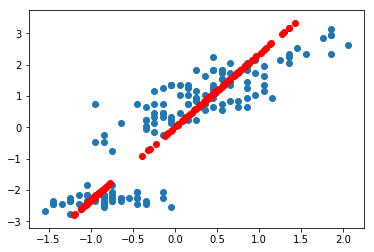

In [53]:
plt.scatter(X_centered['sepal length (cm)'],X_centered['petal length (cm)']);
plt.scatter(svd_recon[:, 0], svd_recon[:, 1], c='r')

Remember the **big idea** :    
is to reduce the dimensionality of the data:    
Select k first columns of U and (and corresponding first kxk columns
of $\Sigma$)

And there's also value in U and V themselves! 

[svd example/ walk thru by hand](http://web.mit.edu/be.400/www/SVD/Singular_Value_Decomposition.htm)

### PCA in sklearn

[pca in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[svd in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)